# Preprocessing for Total Cholesterol

## Setting up Julia Jupyter Kernel

To use Julia on Jupyter Notebook, the package IJulia is needed. Install IJulia from the Julia REPL by pressing ] to enter pkg mode and entering:

```julia
(@v1.5) pkg> add IJulia
```
then
```julia
(@v1.5) pkg> build IJulia
```

Then the Julia kernel will be available on your Jupyter Notebook. 

## Package Installation

The following are the packages used in our analysis:
- Registered packages: CSV, DataFrames, StatsBase, DataStructures, Statistics, Plots, Ipopt, KNITRO (license needed)
- Unregistered packages: SnpArrays, VCFTools, BGEN, WiSER (private), vGWAS (private)

Registered packages can also be installed in the pkg mode of Julia REPL. 
```julia
(@v1.5) pkg> add CSV DataFrames StatsBase DataStructures Statistics Plots Ipopt
```

The vGWAS is the main analysis package. It depends on four other unregistered packages SnpArrays.jl, VCFTools.jl, BGEN.jl, and WiSER.jl. The package has not yet been registered and must be installed using the repository location. Start julia and use the ] key to switch to the package manager REPL and run:

```julia
(@v1.5) pkg> add https://github.com/OpenMendel/SnpArrays.jl
(@v1.5) pkg> add https://github.com/OpenMendel/VCFTools.jl
(@v1.5) pkg> add https://github.com/OpenMendel/BGEN.jl
(@v1.5) pkg> add https://github.com/OpenMendel/WiSER.jl
(@v1.5) pkg> add https://github.com/OpenMendel/vGWAS.jl
```

## Environment setup

The [environment](https://pkgdocs.julialang.org/v1.5/environments/) is defined by `Project.toml` and `Manifest.toml` files located in a certain directory. This is a tool to keep package versions consistent throughout different machines/users. You can copy `Project.toml` and `Manifest.toml` in this directory to your project directory, activate the environment, and instantiate it. KNITRO is not included in this project. In Pkg mode of Julia REPL:

```julia
(@v1.5) pkg> activate PROJECTDIR
(@v1.5) pkg> instantiate
```
where `PROJECTDIR` is the directory in which `Project.toml` and `Manifest.toml` exist. It can be `.` for the current working directory. You will need to run `instantiate` immediately after copying the toml files to your project directory. You will not need to run it thereafter. 
You might want to precompile the packages, especially before running the jobs on a cluster:
```julia
(@v1.5) pkg> precompile
```


In some cases, we might want to update the vGWAS package and possibly others (BGEN package in particular) during the experiment runs. In that case, we will update the toml files in this directory and notify you. Then you will need to copy the updated toml files to your directory then run `instantiate` again in the Pkg mode after activating the environment.



We can also activate environments by running 

In [85]:
using Pkg
pkg"activate ."

 Activating environment at `~/Box Sync/vGWAS/results/ukb_bgen/totchol/Project.toml`


In [86]:
using CSV, Dates, DataFrames
datadir = "../../../datasets/UKBclean"; # the location where the data files from vGWAS/datasets/UKBclean of Box are stored 

on Jupyter Notebooks. Running `pkg"..."` after running `using Pkg` is equivalent to running the command `...` on the Pkg mode of REPL.

## Reading data files and filtering

Start with EUR data: 337,138 samples.

In [87]:
phenotype_info = CSV.read(datadir * "/EUR.txt", DataFrame)
data_center = CSV.read(datadir * "/assessment_center.csv", DataFrame)
phenotype_info = leftjoin(phenotype_info, data_center, on=[:FID=>:FID], makeunique=true)

,FID,IID,AcIsch,MI,PCI,Angina_unstable,Stroke_infarct,Stroke_hem
,Int64,Int64,String,String,String,String,String,String
1,1000012,1000012,0,0,0,0,0,0
2,1000031,1000031,0,0,0,0,0,0
3,1000047,1000047,0,0,0,0,0,0
4,1000073,1000073,0,0,0,0,0,0
5,1000085,1000085,0,0,0,0,0,0
6,1000094,1000094,0,0,0,0,0,0
7,1000101,1000101,0,0,0,0,0,0
8,1000119,1000119,0,0,0,0,0,0
9,1000122,1000122,0,0,0,0,0,0


## Filtering out samples with missing covariates

Filtering out samples with missing covariates we need: `SEX`, `age_2010`, `PC1`, `BMI`, `self_cholesteroldrugs`. 

Sex. No missing there. 

[TODO] UK Biobank uses 0 for females and 1 for males ([source](https://biobank.ctsu.ox.ac.uk/crystal/coding.cgi?id=9)), but we have 1's and 2's here. Which is for which?

In [88]:
using StatsBase

In [89]:
counts(phenotype_info.SEX)

2-element Array{Int64,1}:
 156111
 181027

Age at year 2010. This is later used for age at measurement (age_2010 + year_of_measurement - 2010). No missing again. 

In [90]:
count(isnan.(phenotype_info.age_2010))

0

PC1. no missing again. 

In [91]:
count(isnan.(phenotype_info.PC1))

0

BMI. Some missing exists. Filtered out 337,138 - 336,118 = 1,020 samples. 

In [92]:
phenotype_info.BMI = map(x -> x == "NA" ? missing : parse(Float64, x), phenotype_info.BMI)
phenotype_info = filter(x -> x.BMI !== missing, phenotype_info)

,FID,IID,AcIsch,MI,PCI,Angina_unstable,Stroke_infarct,Stroke_hem
,Int64,Int64,String,String,String,String,String,String
1,1000012,1000012,0,0,0,0,0,0
2,1000031,1000031,0,0,0,0,0,0
3,1000047,1000047,0,0,0,0,0,0
4,1000073,1000073,0,0,0,0,0,0
5,1000085,1000085,0,0,0,0,0,0
6,1000094,1000094,0,0,0,0,0,0
7,1000101,1000101,0,0,0,0,0,0
8,1000119,1000119,0,0,0,0,0,0
9,1000122,1000122,0,0,0,0,0,0


Indicator for cholesterol medication. Some missing exists. Filtered out 336,118 - 334,320 = 1,798 samples.

In [93]:
phenotype_info.self_cholesteroldrugs = map(x -> x == "NA" ? missing : parse(Int, x), phenotype_info.self_cholesteroldrugs)
phenotype_info = filter(x -> x.self_cholesteroldrugs !== missing, phenotype_info)

,FID,IID,AcIsch,MI,PCI,Angina_unstable,Stroke_infarct,Stroke_hem
,Int64,Int64,String,String,String,String,String,String
1,1000012,1000012,0,0,0,0,0,0
2,1000031,1000031,0,0,0,0,0,0
3,1000047,1000047,0,0,0,0,0,0
4,1000073,1000073,0,0,0,0,0,0
5,1000085,1000085,0,0,0,0,0,0
6,1000094,1000094,0,0,0,0,0,0
7,1000101,1000101,0,0,0,0,0,0
8,1000119,1000119,0,0,0,0,0,0
9,1000122,1000122,0,0,0,0,0,0


In [94]:
countmap(phenotype_info.self_cholesteroldrugs)

Dict{Union{Missing, Int64},Int64} with 2 entries:
  0 => 270561
  1 => 63759

## Read in totchol data

In [95]:
totchol_info = CSV.read(datadir * "/totchol.txt", DataFrame)
totchol_info = rename(totchol_info,  Symbol("eid") => :FID)
sort!(totchol_info, [:FID, :event_dt])

,FID,totchol,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,String?,Int64,String,String,String
1,1000050,2.24,25/11/2014,3,44P5.,read3,Serum HDL cholesterol level
2,1000050,6.55,25/11/2014,3,XE2eD,read3,Serum cholesterol level
3,1000050,3.0,28/11/2014,3,44P5.,read3,Serum HDL cholesterol level
4,1000050,6.5,28/11/2014,3,XaJe9,read3,Serum total cholesterol level
5,1000050,5.6,30/09/2003,3,XE2eD,read3,Serum cholesterol level
6,1000068,3.6,01/11/2010,3,XE2eD,read3,Serum cholesterol level
7,1000068,0.92,02/08/2011,3,44P5.,read3,Serum HDL cholesterol level
8,1000068,1.6,02/08/2011,3,44P6.,read3,Serum LDL cholesterol level
9,1000068,3.1,02/08/2011,3,XE2eD,read3,Serum cholesterol level


In [96]:
ENV["LINES"] = 50
sort(collect(countmap(totchol_info.term_description)), by = x -> x[2], rev=true)

28-element Array{Pair{String,Int64},1}:
                   "Serum HDL cholesterol level" => 1043617
                       "Serum cholesterol level" => 910996
                   "Serum LDL cholesterol level" => 674130
                   "Total cholesterol:HDL ratio" => 446603
                   "Serum cholesterol (& level)" => 295148
                                     "See XaJe9" => 63253
                                     "See XSK14" => 42346
                                     "See XaIp4" => 40907
                 "Serum total cholesterol level" => 40236
                                     "See XaN3z" => 23039
                                     "See XaEil" => 22804
 "Serum HDL:non-HDL cholesterol ratio (& level)" => 9843
           "Serum fasting HDL cholesterol level" => 8394
                                     "See XabE1" => 7569
                                     "See X773W" => 2571
                  "Serum VLDL cholesterol level" => 2413
                 "Total cholest

In [97]:
describe(filter(x -> x.term_description == "See XaJe9", totchol_info))

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,FID,3.53989e6,1000187,3.54757e6,6025280,0,Int64
2,totchol,5.07678,1.06,5.0,17.8,0,Float64
3,event_dt,,01/01/1989,,31/12/2016,1,"Union{Missing, String}"
4,data_provider,1.47278,1,1.0,4,0,Int64
5,code,,44PJ.,,44PJ.,0,String
6,terminology,,read2,,read2,0,String
7,term_description,,See XaJe9,,See XaJe9,0,String


In [98]:
describe(filter(x -> x.term_description == "Serum cholesterol level", totchol_info))

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,FID,3.50641e6,1000050,3.5052e6,6025278
2,totchol,5.19156,0.008,5.1,29.0
3,event_dt,,01/01/1901,,31/12/2015
4,data_provider,3.0,3,3.0,3
5,code,,XE2eD,,XE2eD
6,terminology,,read3,,read3
7,term_description,,Serum cholesterol level,,Serum cholesterol level


In [99]:
describe(filter(x -> x.term_description == "Serum HDL cholesterol level", totchol_info))

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,FID,3.5076e6,1000050,3.50422e6,6025280
2,totchol,1.47619,0.01,1.4,29.63
3,event_dt,,01/01/1954,,31/12/2015
4,data_provider,2.77557,1,3.0,4
5,code,,44P5.,,44P5.
6,terminology,,read2,,read3
7,term_description,,Serum HDL cholesterol level,,Serum HDL cholesterol level


In [100]:
describe(filter(x -> x.term_description == "Serum cholesterol (& level)", totchol_info))

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,FID,3.49911e6,1000187,3.48773e6,6025280
2,totchol,5.1619,0.01,5.1,26.0
3,event_dt,,01/01/1981,,31/12/2015
4,data_provider,2.53444,1,2.0,4
5,code,,44P..,,44P..
6,terminology,,read2,,read2
7,term_description,,Serum cholesterol (& level),,Serum cholesterol (& level)


In [101]:
describe(filter(x -> x.term_description == "Serum LDL cholesterol level", totchol_info))

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,FID,3.5105e6,1000068,3.50961e6,6025280
2,totchol,3.03451,0.01,3.0,27.0
3,event_dt,,01/01/1990,,31/12/2015
4,data_provider,2.82264,1,3.0,4
5,code,,44P6.,,44P6.
6,terminology,,read2,,read3
7,term_description,,Serum LDL cholesterol level,,Serum LDL cholesterol level


In [102]:
describe(filter(x -> x.term_description == "Serum total cholesterol level", totchol_info))

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,FID,3.50799e6,1000050,3.50798e6,6025184
2,totchol,5.2778,1.0,5.23,17.3
3,event_dt,,01/01/1985,,31/12/2015
4,data_provider,3.0,3,3.0,3
5,code,,XaJe9,,XaJe9
6,terminology,,read3,,read3
7,term_description,,Serum total cholesterol level,,Serum total cholesterol level


Codes `Serum total cholesterol level` and `Serum total cholesterol level` seem to give similar means, will just use those codings. 

In [103]:
# based on https://github.com/spiros/ukb-biomarker-phenotypes/blob/master/Cholesterol.csv
acceptable_descriptions = ["Serum total cholesterol level", "Serum cholesterol level", "See XaJe9", 
    "See XSK14", "Serum cholesterol (& level)", "Serum total cholesterol level"]
filter!(x -> x.term_description in acceptable_descriptions, totchol_info)

,FID,totchol,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,String?,Int64,String,String,String
1,1000050,6.55,25/11/2014,3,XE2eD,read3,Serum cholesterol level
2,1000050,6.5,28/11/2014,3,XaJe9,read3,Serum total cholesterol level
3,1000050,5.6,30/09/2003,3,XE2eD,read3,Serum cholesterol level
4,1000068,3.6,01/11/2010,3,XE2eD,read3,Serum cholesterol level
5,1000068,3.1,02/08/2011,3,XE2eD,read3,Serum cholesterol level
6,1000068,3.6,06/10/2008,3,XE2eD,read3,Serum cholesterol level
7,1000068,5.7,07/01/1999,3,XE2eD,read3,Serum cholesterol level
8,1000068,3.5,07/08/2007,3,XE2eD,read3,Serum cholesterol level
9,1000068,3.7,09/02/2009,3,XE2eD,read3,Serum cholesterol level


Number of subjects with totchol data: 

In [104]:
length(unique(totchol_info[!, :FID])) 

197303

## Join totchol data with phenotypes

Leftjoin totchol_info and phenotype_info.

In [105]:
@time totchol_info_joined = leftjoin(totchol_info, phenotype_info, on=[:FID=>:FID], makeunique=true) 

 25.789380 seconds (1.63 k allocations: 1.259 GiB, 74.25% gc time)


,FID,totchol,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,String?,Int64,String,String,String
1,1000050,6.55,25/11/2014,3,XE2eD,read3,Serum cholesterol level
2,1000050,6.5,28/11/2014,3,XaJe9,read3,Serum total cholesterol level
3,1000050,5.6,30/09/2003,3,XE2eD,read3,Serum cholesterol level
4,1000068,3.6,01/11/2010,3,XE2eD,read3,Serum cholesterol level
5,1000068,3.1,02/08/2011,3,XE2eD,read3,Serum cholesterol level
6,1000068,3.6,06/10/2008,3,XE2eD,read3,Serum cholesterol level
7,1000068,5.7,07/01/1999,3,XE2eD,read3,Serum cholesterol level
8,1000068,3.5,07/08/2007,3,XE2eD,read3,Serum cholesterol level
9,1000068,3.7,09/02/2009,3,XE2eD,read3,Serum cholesterol level


Filter out rows with no phenotype information (non-EUR or missing BMI, etc.)

In [106]:
1_351_979 - 904_820 # rows filtered out

447159

In [107]:
totchol_info_joined = filter(x -> x.IID !== missing, totchol_info_joined)

,FID,totchol,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,String?,Int64,String,String,String
1,1000094,4.9,10/12/2008,3,XE2eD,read3,Serum cholesterol level
2,1000094,5.1,14/12/2011,3,XE2eD,read3,Serum cholesterol level
3,1000094,5.2,16/09/2009,3,XE2eD,read3,Serum cholesterol level
4,1000094,5.6,18/04/2016,3,XE2eD,read3,Serum cholesterol level
5,1000094,7.6,18/07/2008,3,XE2eD,read3,Serum cholesterol level
6,1000094,6.0,19/02/2014,3,XE2eD,read3,Serum cholesterol level
7,1000094,4.6,19/06/2013,3,XE2eD,read3,Serum cholesterol level
8,1000094,4.9,19/09/2012,3,XE2eD,read3,Serum cholesterol level
9,1000094,4.7,25/03/2011,3,XE2eD,read3,Serum cholesterol level


In [108]:
length(unique(totchol_info_joined.FID))

133592

We are left with 133_592 samples. 

* Samples in EUR but without totchol measurements: 334_320 - 133_592 = 200_728
* Samples with lipid measurement but not in EUR: 197_303 - 133_592 =  63_711

## Cleaning measurement dates and age at measurements

Remove rows with missing measurement dates. This drops 2 further samples.

In [109]:
904_820 - 904_769

51

In [110]:
totchol_info_joined = filter(x -> x.event_dt !== missing, totchol_info_joined)

,FID,totchol,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,String?,Int64,String,String,String
1,1000094,4.9,10/12/2008,3,XE2eD,read3,Serum cholesterol level
2,1000094,5.1,14/12/2011,3,XE2eD,read3,Serum cholesterol level
3,1000094,5.2,16/09/2009,3,XE2eD,read3,Serum cholesterol level
4,1000094,5.6,18/04/2016,3,XE2eD,read3,Serum cholesterol level
5,1000094,7.6,18/07/2008,3,XE2eD,read3,Serum cholesterol level
6,1000094,6.0,19/02/2014,3,XE2eD,read3,Serum cholesterol level
7,1000094,4.6,19/06/2013,3,XE2eD,read3,Serum cholesterol level
8,1000094,4.9,19/09/2012,3,XE2eD,read3,Serum cholesterol level
9,1000094,4.7,25/03/2011,3,XE2eD,read3,Serum cholesterol level


In [111]:
length(unique(totchol_info_joined.FID))

133590

Obtain year of measurement and age at measurement:

In [112]:
using Dates
dateform = DateFormat("d/m/y")

dateformat"d/m/y"

In [113]:
# totchol_info_joined.year_of_measurement = map(x -> parse(Int, x.event_dt[1:4]), eachrow(totchol_info_joined));
totchol_info_joined.year_of_measurement = map(x -> year(Date(x.event_dt, dateform)), eachrow(totchol_info_joined));

In [114]:
# totchol_info_joined.age_at_measurement = map(x -> x.age_2010 + parse(Int, x.event_dt[1:4]) - 2010, eachrow(totchol_info_joined));
totchol_info_joined.age_at_measurement = map(x -> x.age_2010 + year(Date(x.event_dt, dateform)) - 2010, eachrow(totchol_info_joined));

[TODO] Some of the year of measurements are too old or even in the future. Maybe we should filter pre-1990 and 2037 measurements? This would drop only 13 subjects.

Special meaning for year 1901 1902, and 1903, 2037

https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?tk=68EMKkCB8skqob929k0lJTa0eLbPoYnY157881&id=819


| Date | Meaning |
|:---|:---|
| 1900-01-01 |	Code has no event date |
| 1901-01-01 |	Code has event date before participant's date of birth |
| 1902-02-02 |	Code has event date matching participant's date of birth |
| 1903-03-03 |	Code has event date after participant's date of birth and falls in the same calendar year as date of birth |
| 2037-07-07 |	Code has event date in the future and is presumed to be a place-holder or other system default |

We remove them. 

In [115]:
minimum(totchol_info_joined.age_at_measurement)

-65

In [116]:
maximum(totchol_info_joined.age_at_measurement)

98

In [117]:
yom_map = countmap(totchol_info_joined.year_of_measurement);
for v in sort(yom_map)
    println(v)
end

1901 => 1
1902 => 18
1903 => 2
1946 => 2
1950 => 1
1964 => 2
1965 => 2
1970 => 1
1971 => 1
1974 => 1
1975 => 1
1976 => 1
1977 => 1
1978 => 5
1979 => 2
1980 => 5
1981 => 6
1982 => 4
1983 => 7
1984 => 8
1985 => 47
1986 => 78
1987 => 56
1988 => 181
1989 => 279
1990 => 661
1991 => 1079
1992 => 1529
1993 => 2076
1994 => 1920
1995 => 2162
1996 => 2680
1997 => 3234
1998 => 4133
1999 => 5411
2000 => 8095
2001 => 12252
2002 => 18109
2003 => 25831
2004 => 38683
2005 => 45065
2006 => 51924
2007 => 56326
2008 => 61850
2009 => 65038
2010 => 66986
2011 => 69515
2012 => 73501
2013 => 78339
2014 => 75687
2015 => 75847
2016 => 46220
2017 => 9898
2037 => 6


In [118]:
904_769 - 904_742

27

In [119]:
totchol_info_joined = filter(x -> 1904 <= x.year_of_measurement <= 2017, totchol_info_joined)

,FID,totchol,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,String?,Int64,String,String,String
1,1000094,4.9,10/12/2008,3,XE2eD,read3,Serum cholesterol level
2,1000094,5.1,14/12/2011,3,XE2eD,read3,Serum cholesterol level
3,1000094,5.2,16/09/2009,3,XE2eD,read3,Serum cholesterol level
4,1000094,5.6,18/04/2016,3,XE2eD,read3,Serum cholesterol level
5,1000094,7.6,18/07/2008,3,XE2eD,read3,Serum cholesterol level
6,1000094,6.0,19/02/2014,3,XE2eD,read3,Serum cholesterol level
7,1000094,4.6,19/06/2013,3,XE2eD,read3,Serum cholesterol level
8,1000094,4.9,19/09/2012,3,XE2eD,read3,Serum cholesterol level
9,1000094,4.7,25/03/2011,3,XE2eD,read3,Serum cholesterol level


In [120]:
length(unique(totchol_info_joined.FID))

133590

In [121]:
minimum(totchol_info_joined.age_at_measurement)

3

In [122]:
maximum(totchol_info_joined.age_at_measurement)

79

In [123]:
nobs = countmap(totchol_info_joined.FID)
findmax(nobs)

(142, 2088688)

In [124]:
nobs[4262978]

101

Ages at measurement with the remaining data lies between 3-79, which is way more reasonable.

## Shifting

We will shift based on [this NEJM link](https://www.nejm.org/doi/10.1056/NEJMoa1600176?url_ver=Z39.88-2003&rfr_id=ori%3Arid%3Acrossref.org&rfr_dat=cr_pub++0www.ncbi.nlm.nih.gov)
```
The LDL cholesterol level (measured in the subsample of participants described in the Methods section) was 39.6 mg per deciliter (1.02 mmol per liter) lower in the rosuvastatin group than in the placebo group at 1 year.
```
Shift total cholesterol same as LDL

In [125]:
# FIND SHIFT ?
totchol_info_joined[!, :totchol_shifted] = map(x -> x.self_cholesteroldrugs == 1 ? x.totchol + 1.02 :
                               x.totchol, eachrow(totchol_info_joined)) # figure out shift rate

904742-element Array{Float64,1}:
 4.9
 5.1
 5.2
 5.6
 7.6
 6.0
 4.6
 4.9
 4.7
 4.4
 4.8
 4.3
 5.3
 4.5
 4.0
 6.4
 6.3
 5.9
 5.6
 5.9
 5.4
 4.4
 5.8
 ⋮
 4.7
 5.8
 4.3
 4.3
 5.6
 2.84
 5.0
 3.07
 2.87
 5.6
 2.86
 6.4
 6.65
 5.07
 4.7
 4.7
 5.1
 4.2
 4.8
 5.1
 4.2
 4.4

## Standardization

We compute standardized age, bmi, etc. before splitting diabetic and nondiabetic samples.  

In [126]:
using Statistics
standardizes(x) = (x .- mean(skipmissing(x))) ./ std(skipmissing(x))
totchol_info_joined[!, :std_age] = standardizes(totchol_info_joined[!, :age_at_measurement])
totchol_info_joined[!, :std_age_sq] = map(x -> x.std_age ^ 2, eachrow(totchol_info_joined))
totchol_info_joined[!, :std_bmi] = standardizes(totchol_info_joined[!, :BMI])
totchol_info_joined[!, :log_totchol] = log.(totchol_info_joined[!, :totchol_shifted]);
totchol_info_joined[!, :std_totchol] = standardizes(totchol_info_joined[!, :totchol_shifted]);

## Split

Now we split the data into diabetic samples and nondiabetic samples. 

In [127]:
diabetics = CSV.read(datadir * "/diabetics.txt", DataFrame)[!, :FID]
using DataStructures
diabetics_map = DefaultDict{Int, Bool}(false)
for v in diabetics
    diabetics_map[v] = true
end

We have 13,193 diabetic samples remaining: 

In [128]:
totchol_info_diabetics = filter(x -> diabetics_map[x.FID], totchol_info_joined)

,FID,totchol,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,String?,Int64,String,String,String
1,1000602,4.1,03/05/2012,3,XE2eD,read3,Serum cholesterol level
2,1000602,4.7,04/08/2004,3,XE2eD,read3,Serum cholesterol level
3,1000602,3.6,10/06/2010,3,XE2eD,read3,Serum cholesterol level
4,1000602,4.5,12/08/2005,3,XE2eD,read3,Serum cholesterol level
5,1000602,3.9,13/04/2007,3,XE2eD,read3,Serum cholesterol level
6,1000602,3.9,13/05/2011,3,XE2eD,read3,Serum cholesterol level
7,1000602,3.6,17/06/2008,3,XE2eD,read3,Serum cholesterol level
8,1000602,3.8,21/09/2007,3,XE2eD,read3,Serum cholesterol level
9,1000602,3.9,24/04/2006,3,XE2eD,read3,Serum cholesterol level


In [129]:
length(unique(totchol_info_diabetics.FID))

13002

In [130]:
d = countmap(totchol_info_diabetics.FID)
diabetic_measurements = []
for (k, v) in d
    push!(diabetic_measurements, v)
end

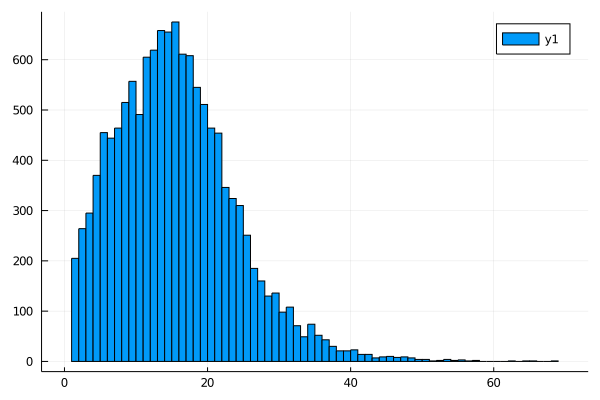

In [131]:
using Plots
histogram(diabetic_measurements)

In [132]:
CSV.write("totchol_diabetics.csv", totchol_info_diabetics)

"totchol_diabetics.csv"

And we have 135,664 nondiabetic samples remaining. 

In [133]:
totchol_info_nondiabetics = filter(x -> !diabetics_map[x.FID], totchol_info_joined)

,FID,totchol,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,String?,Int64,String,String,String
1,1000094,4.9,10/12/2008,3,XE2eD,read3,Serum cholesterol level
2,1000094,5.1,14/12/2011,3,XE2eD,read3,Serum cholesterol level
3,1000094,5.2,16/09/2009,3,XE2eD,read3,Serum cholesterol level
4,1000094,5.6,18/04/2016,3,XE2eD,read3,Serum cholesterol level
5,1000094,7.6,18/07/2008,3,XE2eD,read3,Serum cholesterol level
6,1000094,6.0,19/02/2014,3,XE2eD,read3,Serum cholesterol level
7,1000094,4.6,19/06/2013,3,XE2eD,read3,Serum cholesterol level
8,1000094,4.9,19/09/2012,3,XE2eD,read3,Serum cholesterol level
9,1000094,4.7,25/03/2011,3,XE2eD,read3,Serum cholesterol level


In [134]:
length(unique(totchol_info_nondiabetics.FID))

120588

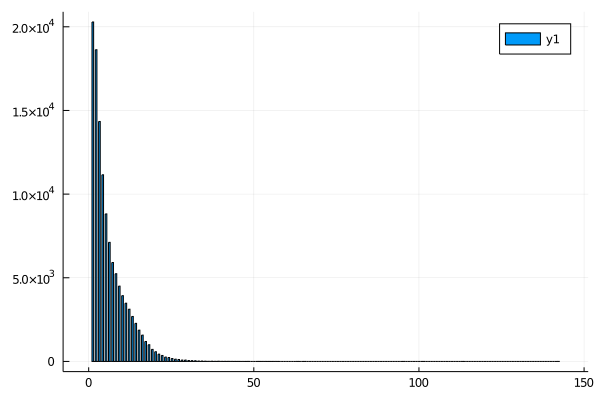

In [135]:
d = countmap(totchol_info_nondiabetics.FID)
nondiabetic_measurements = []
for (k, v) in d
    push!(nondiabetic_measurements, v)
end
histogram(nondiabetic_measurements)

In [136]:
CSV.write("totchol_nondiabetics.csv", totchol_info_nondiabetics)

"totchol_nondiabetics.csv"

In [137]:
using CSV, DataFrames
df = CSV.read("totchol_nondiabetics.csv", DataFrame)

,FID,totchol,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,String,Int64,String,String,String
1,1000094,4.9,10/12/2008,3,XE2eD,read3,Serum cholesterol level
2,1000094,5.1,14/12/2011,3,XE2eD,read3,Serum cholesterol level
3,1000094,5.2,16/09/2009,3,XE2eD,read3,Serum cholesterol level
4,1000094,5.6,18/04/2016,3,XE2eD,read3,Serum cholesterol level
5,1000094,7.6,18/07/2008,3,XE2eD,read3,Serum cholesterol level
6,1000094,6.0,19/02/2014,3,XE2eD,read3,Serum cholesterol level
7,1000094,4.6,19/06/2013,3,XE2eD,read3,Serum cholesterol level
8,1000094,4.9,19/09/2012,3,XE2eD,read3,Serum cholesterol level
9,1000094,4.7,25/03/2011,3,XE2eD,read3,Serum cholesterol level


In [138]:
using StatsBase

In [139]:
d = countmap(df.FID)
nondiabetic_measurements = []
for (k, v) in d
    if v > 200
        println(k)
    end
    push!(nondiabetic_measurements, v)
end
#histogram(nondiabetic_measurements)

In [140]:
diabetic_samples = unique(totchol_info_diabetics.FID);
nondiabetic_samples = unique(totchol_info_nondiabetics.FID);

In [141]:
io = open("diabetes_subjects_totchol.txt", "w")
for v in diabetic_samples
    println(io, v)
end
close(io)

In [142]:
io = open("nondiabetes_subjects_totchol.txt", "w")
for v in nondiabetic_samples
    println(io, v)
end
close(io)

In [143]:
length(nondiabetic_samples)

120588

In [144]:
unique(totchol_info_nondiabetics[!, :center])

22-element Array{Union{Missing, String},1}:
 "Newcastle"
 "Birmingham"
 "Sheffield"
 "Nottingham"
 "Reading"
 "Edinburgh"
 "Cardiff"
 "Hounslow"
 "Leeds"
 "Bristol"
 "Bury"
 "Middlesborough"
 "Glasgow"
 "Oxford"
 "Stoke"
 "Swansea"
 "Croydon"
 "Manchester"
 "Wrexham"
 "Liverpool"
 "Barts"
 "Stockport (pilot)"

In [145]:
unique(data_center[!, :center])

22-element Array{String,1}:
 "Nottingham"
 "Bury"
 "Sheffield"
 "Glasgow"
 "Croydon"
 "Liverpool"
 "Leeds"
 "Reading"
 "Birmingham"
 "Swansea"
 "Cardiff"
 "Newcastle"
 "Middlesborough"
 "Bristol"
 "Hounslow"
 "Barts"
 "Edinburgh"
 "Stoke"
 "Oxford"
 "Manchester"
 "Stockport (pilot)"
 "Wrexham"

## Fitting the null model

Content of null_fitter_totchol_diabetes.jl: 

```julia
using DataFrames, CSV
using Statistics
using vGWAS
using Ipopt, WiSER
using LinearAlgebra
using KNITRO
using BGEN
# fit the null model
BLAS.set_num_threads(1)
solver = KNITRO.KnitroSolver(outlev=3) # outlev 0-6

genetic_iids_subsample = CSV.read("diabetes_subjects_totchol.txt", DataFrame; header=false)[!, 1]


totchol_data = CSV.read("totchol_diabetics.csv", DataFrame)
genetic_iids_subsample = unique(totchol_data.FID)
@time nm = vgwas(@formula(std_totchol ~ 1 + SEX + std_age + std_age_sq +
        PC1 + PC2 + PC3 + PC4 + PC5 + std_bmi),
    @formula(std_totchol ~ 1 + std_age),
    @formula(std_totchol ~ 1 + SEX + std_age + std_age_sq +
        PC1 + PC2 + PC3 + PC4 + PC5 +
        std_bmi),
    :IID,
    totchol_data,
    nothing;
    nullfile="totchol.test.diabetics.null.txt",
    solver=solver,
    runs=10
)

println(nm)
using Serialization
open("fittednullmodel.totchol.test.diabetics.jls", "w") do io
    Serialization.serialize(io, nm)
end
```
- change `std_totchol` to `std_totchol` for analyzing stotchol
- change `diabetes` or `diabetics` to `nondiabetics` or `nondiabetes` for analyzing non-diabetes participants
- Knitro is a commercial library installed on Hua's desktop. We decided to fit the null model only on Hua's machine, and when Aubrey needs to fit a null model, the data or the fitted null models will be shared through Box. 

## Running vGWAS on a cluster

The julia script for actual score test (scoretest_totchol.jl) for a piece of BGEN file:

```julia
using DataFrames, CSV
using Statistics
using vGWAS
using WiSER
using LinearAlgebra
using BGEN
# fit the null model
BLAS.set_num_threads(1)


using Serialization

bgendir = ARGS[1] # ../ukb_imputed
chr = ARGS[2] # 1 to 22
fitted_null = ARGS[3] # "fittednullmodel.totchol.test.diabetics.jls"
pvalfile = ARGS[4] # "totchol.test.diabetics.chr$(chr).txt"
chunkidx = parse(Int, ARGS[5])
nchunks  = parse(Int, ARGS[6])

nm = open(deserialize, fitted_null)
genetic_iids_subsample = nm.ids

bgenfilename = bgendir * "/ukb_imp_chr$(chr)_v3"
samplefilename = bgendir * "/ukb48152_imp_chr$(chr)_v3_s487317.sample"
mfifilename = bgendir * "/ukb_mfi_chr$(chr)_v3.txt"
ukb_data = Bgen(bgenfilename * ".bgen"; sample_path = samplefilename)
genetic_iids = map(x -> parse(Int, split(x, " ")[1]), samples(ukb_data))

order_dict = Dict{Int, Int}()
for (i, iid) in enumerate(genetic_iids)
    order_dict[iid] = i
end

# sort!(bp_data, order(:IID, by=x -> order_dict[x]))

sample_indicator = falses(length(genetic_iids))
for v in genetic_iids_subsample
    sample_indicator[order_dict[v]] = true
end

# GWAS for each chromosome


min_maf = 0.002
min_info_score = 0.3
min_hwe_pval = 1e-10


mfi = CSV.read(mfifilename, DataFrame; header=false)
mfi.Column8 = map(x -> x == "NA" ? NaN : parse(Float64, x), mfi.Column8) # Column8: info score
snpmask = (mfi.Column6 .> min_maf) .& (mfi.Column8 .> 0.3) # Column6: MAF

chunksize = n_variants(ukb_data) ÷ nchunks + (n_variants(ukb_data) % nchunks > 0 ? 1 : 0)
startidx = chunksize * (chunkidx - 1) + 1
endidx = min(chunksize * chunkidx, n_variants(ukb_data))
snpmask = snpmask[startidx:endidx]
println("running for variants $startidx to $endidx")

vgwas(nm, bgenfilename * ".bgen", count(sample_indicator);
    samplepath=samplefilename,
    pvalfile=pvalfile,
    snpinds=snpmask,
    min_hwe_pval = min_hwe_pval,
    bgenrowinds = sample_indicator,
    startidx = startidx,
    endidx = endidx,
    usespa=true)

```

- Command-line arguments
    - Argument 1: directory for the BGEN files. BGEN files (.bgen), BGEN index files (.bgen.bgi), and MFI files (.txt) should be included there.
    - Argument 2: chromosome
    - Argument 3: fitted null model (.jls)
    - Argument 4: path for the result p-value file
    - Argument 5: chunk index (1-based)
    - Argument 6: number of chunks
    
The code above runs the analysis on `ARGS[5]`-th slice out of `ARGS[6]` slices of chromosome `ARGS[2]`.

The following is the Hoffman2 jobscript using job array feature of Univa Grid Engine: (`totchol_diabetes.sh`)

```bash
#!/bin/bash
#$ -cwd
# error = Merged with joblog
#$ -o joblog.$JOB_ID.$TASK_ID
#$ -j y
#$ -pe shared 2
#$ -l h_rt=8:00:00,h_data=8G,arch=intel*
# Email address to notify
##$ -M $USER@mail
# Notify when
#$ -m a
#  Job array indexes
#$ -t 1-352:1

NCHUNKS=16
CHUNKIDX=$(( (${SGE_TASK_ID} - 1) % ${NCHUNKS} + 1 ))
CHR=$(( (${SGE_TASK_ID} - 1) / ${NCHUNKS} + 1))

PROJECTDIR=/u/home/k/kose/project-biostat-chair/bp/jobscripts
BGENDIR=/u/home/k/kose/project-biostat-chair/imputed
FITTED_NULL=/u/home/k/kose/project-biostat-chair/bp/fittednullmodel.totchol.test.diabetics.jls
PVALFILE=/u/home/k/kose/project-biostat-chair/bp/pvalfiles/totchol.test.diabetes.chr${CHR}.${CHUNKIDX}of${NCHUNKS}.txt

. /u/local/Modules/default/init/modules.sh
echo $CHUNKIDX
echo $CHR
echo $PVALFILE
module load julia/1.5.4
time julia --project=${PROJECTDIR} ${PROJECTDIR}/scoretest_bp.jl ${BGENDIR} ${CHR} ${FITTED_NULL} ${PVALFILE} ${CHUNKIDX} ${NCHUNKS}
```

```bash
#!/bin/bash
#$ -cwd
# error = Merged with joblog
#$ -o joblog.$JOB_ID.$TASK_ID
#$ -j y
#$ -pe shared 2
#$ -l h_rt=8:00:00,h_data=8G,arch=intel*
# Email address to notify
##$ -M $USER@mail
# Notify when
#$ -m a
#  Job array indexes
#$ -t 1-352:1

NCHUNKS=16
CHUNKIDX=$(( (${SGE_TASK_ID} - 1) % ${NCHUNKS} + 1 ))
CHR=$(( (${SGE_TASK_ID} - 1) / ${NCHUNKS} + 1))

PROJECTDIR=/u/home/k/kose/project-biostat-chair/bp/jobscripts
BGENDIR=/u/home/k/kose/project-biostat-chair/imputed
FITTED_NULL=/u/home/k/kose/project-biostat-chair/bp/fittednullmodel.totchol.test.diabetics.jls
PVALFILE=/u/home/k/kose/project-biostat-chair/bp/pvalfiles/totchol.test.diabetes.chr${CHR}.${CHUNKIDX}of${NCHUNKS}.txt

. /u/local/Modules/default/init/modules.sh
echo $CHUNKIDX
echo $CHR
echo $PVALFILE
module load julia/1.5.4
time julia --project=${PROJECTDIR} ${PROJECTDIR}/scoretest_bp.jl ${BGENDIR} ${CHR} ${FITTED_NULL} ${PVALFILE} ${CHUNKIDX} ${NCHUNKS}
```

This scripts runs the analysis by splitting each chromosome into 16 slices. It can be modified by changing the number 352 in line 13 to 16 * (number_of_slices) and changing 16 in line 15 to (number_of_slices).  
The jobs should be submitted via
```sh
qsub totchol_diabetes.sh
```